<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Business Statistics</center></font></h1>
<h1><center>Common Statistical Tests - Week 3</center></h1>

<center><img src="https://cdn.pixabay.com/photo/2019/12/16/04/17/social-media-4698431__340.jpg" width="1000" height="600"></center>

<b><h1><center> Mobile Internet Case Study</center></h1></b>

## Problem Statement

### Business Context

With the availability of internet services on mobile devices, the way that people work, socialize, organize, and entertain themselves has radically changed. With access to entertainment channels, news, learning and research material, real-time video calling, and more, these multimedia communication devices have become an integral part of our day-to-day lives.


### Objective

A reputed research and consultation firm recently conducted a study on the increasing rate of internet usage over the past decade and reported that a typical American spends 144 minutes (2.4 hours) per day, on average, accessing the internet via a mobile device. You wish to test the validity of this statement. So, you reached out to friends and family to understand the time they spend per day accessing the internet via mobile devices. You received responses from 29 people and based on that, you want to check if there is enough evidence to suggest that the mean time spent per day accessing the internet via mobile devices is different from 144 minutes. A 5% significance level has been chosen.

**ADEL'S QUESTION**: what could be wrong with the way the experiment is conducted ?


### Data Dictionary

The results for the time spent per day accessing the Internet via a mobile device (in minutes) are stored in *InternetMobileTime.csv*.

## Exploring the dataset

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import scipy.stats as stats

**ADEL'S NOTE**: Since, in principle, we still don't know the test to use, the appropriate test function will be imported later

### Reading the data into a dataframe

In [2]:
data = pd.read_csv('InternetMobileTime.csv')

### Data overview

The initial steps to get an overview of any dataset is to: 
- observe few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### Displaying rows from the dataset

We can do this with the `.head()` method of Pandas DataFrames

In [3]:
data.head()

,Minutes
0,72
1,144
2,48
3,72
4,36


* There is only one column `Minutes` in the sample which represents the time spent per day accessing the Internet via a mobile device (in minutes)

#### Checking shape, data types, and missing values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Minutes  29 non-null     int64
dtypes: int64(1)
memory usage: 360.0 bytes


* The dataset contains 29 rows
* The `Minutes` column is a numeric column
* There are no missing values

#### Statistical summary

In [5]:
data.describe()

,Minutes
count,29.000000
mean,176.344828
std,142.185059
min,24.000000
25%,72.000000
50%,144.000000
75%,288.000000
max,576.000000


* From the sample, on an average, the mobile internet usage time by a person is 176.34 minutes per day.
* The median internet usage time (144 minutes) is less than the average, which suggests that the data is a little skewed to the right
* The minimum and maximum internet usage time from the sample data are 24 minutes and 576 minutes respectively. This shows that the usage time covers a wide range of values.

#### Visualization

Sample mean = 176.3448275862069


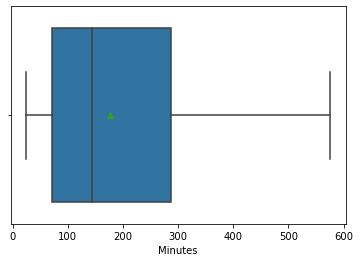

In [9]:
# Visual analysis of the distribution of 'Minutes' column
sns.boxplot(x="Minutes", data = data, showmeans= True)
print('Sample mean =',data['Minutes'].mean())

* The distribution of the mobile internet usage time is skewed to the right
* The sample mean is 176.34 minutes.
* Is the sample mean significantly different from the hypothesized population mean (144 minutes)? To determine this with significance, we will test the difference using a statistical test.

## Hypothesis testing

### Step 1: Define null and alternate hypotheses

The null and alternative hypotheses can be formulated as:

> $H_0:$ The mean mobile internet usage time by a typical American is equal to 144 minutes per day <br>
> $H_a:$ The mean mobile internet usage time by a typical American is not equal to 144 minutes per day

Let $\mu$ be the mean mobile internet usage time by a typical Americal per day

Mathematically, the above formulated hypotheses can be written as:

>$H_0: \mu = 144 $ <br>
$H_a: \mu \neq 144 $

So this is a **two-tailed** hypothesis test

### Step 2: Select Appropriate test

This is a case of a two-tailed test for the significance of a **single mean**. So it is a one sample test.

We assume that the samples are randomly selected, independent, and since the standard deviation is unknown and $n < 30$ we will use the 1-sample t-test. This is implemented with the function `ttest_1samp()` from the `scipy.stats` library.

In [6]:
from scipy.stats import ttest_1samp

- The `ttest_1samp()` function takes the sample observations, hypothesized population mean and the direction of the alternative hypothesis as input and returns the test statistic and the p-value for the test. 
    - The sample observations are the values of internet usage time in the dataset.
    - The hypotheisized population mean, as provided in the problem statement and defined in the formulated hypotheses is 144
    - As it is a two-tailed test, we will set the argument `alternative = 'two-sided'`

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha$ = 0.05.

### Step 4: Calculate the p-value

In [11]:
# find the p-value
test_stat, p_value = ttest_1samp(data['Minutes'],
                                 popmean = 144,
                                 alternative = 'two-sided')
print('The p-value is', p_value)

The p-value is 0.23076657128249872


In [12]:
test_stat

1.2250388885748442

### Step 5: Compare the p-value with $\alpha$

In [13]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.23076657128249872 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 6: Draw Inference

At the 5% significance level, we fail to reject the null hypothesis. Hence we do not have enough statistical evidence to say that the mean time spent on the internet is not equal to 144 minutes.

### ADEL ADD-ON: calculating the p-value without the ttest_1samp

We can recover the p-value above in the following way:

#### Calculate the test statistics

The test statistics writes $$T = \frac{\bar x - \mu}{s/\sqrt{n}}$$
where 

In [14]:
n = 29
xbar = data.Minutes.mean()
s = data.Minutes.std()
mu = 144

Hence the value of the statistics

In [15]:
statistics = np.sqrt(n)*(xbar - mu)/s
statistics

1.2250388885748442

#### Calculate the p-value

Since the T statistics follows a t-distribution with 28 degrees of freedom and the test is two-tailed, the p-value writes
$$p-value = 2P(T > |statistics|)$$

In [19]:
pVal = 2*(1 - stats.t.cdf(np.abs(statistics), df = n-1))
pVal

0.23076657128249867

Which is the same as above

#### Critical value approach

Our statistics follows a t-distribution. The critical value for a two-tailed test is such that
$$P(T > t_{crit}) = \alpha/2$$

Since $$P(T > t_{crit}) = 1 - P(T \leq t_{crit}) = 1 - CDF(t_{crit})$$

This means that $$CDF(t_{crit}) = 1 - \alpha / 2$$

We can find the critical value with the *ppf* function of the t-distribution in python

In [21]:
critical_value = stats.t.ppf(1 - 0.05/2, df=n-1)
critical_value

2.048407141795244

Since the absolute value of the test statistics is smaller than the critical value, i.e. the statistics is not in the rejection region, we fail to reject the null hypothesis.